<a href="https://colab.research.google.com/github/Sumingson/Python/blob/main/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

начало работы
program was made by Vladislav Sokolov 20BI-2
 
Файлы используемые в номере
['table1.gsheet', 'task1.ipynb']
-rw------- 1 root 66583 Mar 15 17:23 /content/drive/MyDrive/swot/task1.ipynb
Mon Mar 15 17:24:06 MSK 2021

Работаем с таблицей
total 66
-rw------- 1 root   151 Mar 15 17:14 table1.gsheet
-rw------- 1 root 66583 Mar 15 17:23 task1.ipynb

Работаем с листом
НОВЫЙ СТОЛБИК =  Strengths


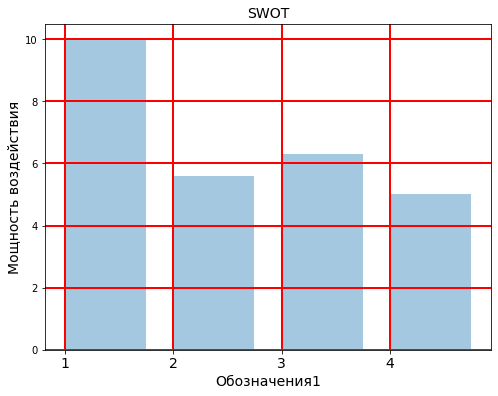

1 - Автопарк грузовиков, собственная парковка, мойка, мастерская : 10.0 ; 2 - Скллад запчастей для грузовиков : 5.6 ; 3 - Программа отслеж. геопозицию грузовиков : 6.3 ; 4 - Контракт на грузоперевозку с пром компаниями : 5.0 ; 
[10.0, 5.6, 6.3, 5.0]
Сумма равна:  26.9

НОВЫЙ СТОЛБИК =  Weaknesses


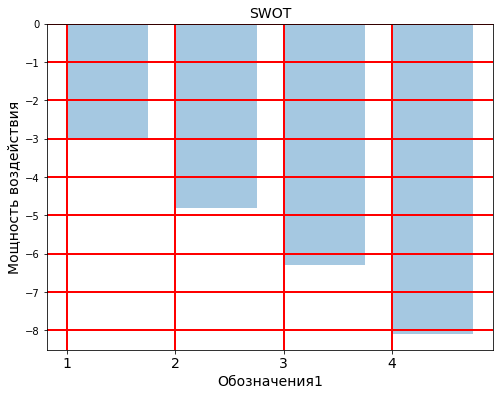

1 - Нестабильность состава рабочих нижнего звена : -3.0 ; 2 - Частое изменение законодательства в сфере грузоперевозок : -4.8 ; 3 - Низкое качество ремонта грузвиков : -6.3 ; 4 - Большой срок окупаемости, из-за больших накладных расходов : -8.1 ; 
[-3.0, -4.8, -6.3, -8.1]
Сумма равна:  -22.2

НОВЫЙ СТОЛБИК =  Opportunities


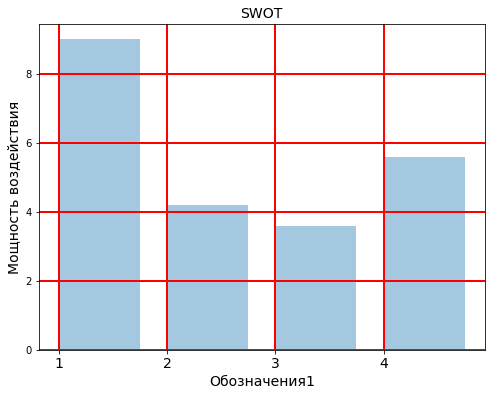

1 - Системы идентификации и контроля водителя : 9.0 ; 2 - Расширение на межрегиональный уровень : 4.2 ; 3 - Расширение спектра оказываемых услуг : 3.6 ; 4 - Автоматизация бух учета : 5.6 ; 
[9.0, 4.2, 3.6, 5.6]
Сумма равна:  22.4

НОВЫЙ СТОЛБИК =  Threats


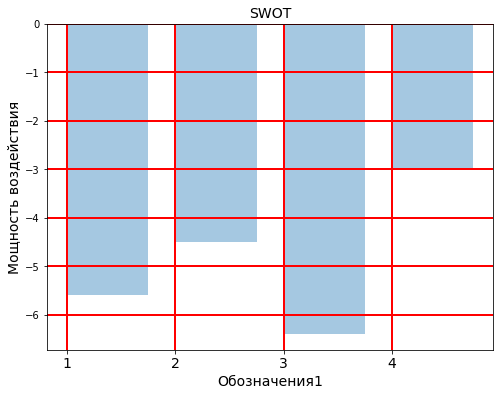

1 - Большая конкуренция из-за большого числа ИП'шников, а не больших организаций : -5.6 ; 2 - Потеря контракта с пром предприятиями (портами, заводами) : -4.5 ; 3 - Сезонность работ (летом спрос выше, чем зимой) : -6.4 ; 4 - Зависимость от суммарных потребностей рынка на грузоперевозки : -3.0 ; 
[-5.6, -4.5, -6.4, -3.0]
Сумма равна:  -19.5



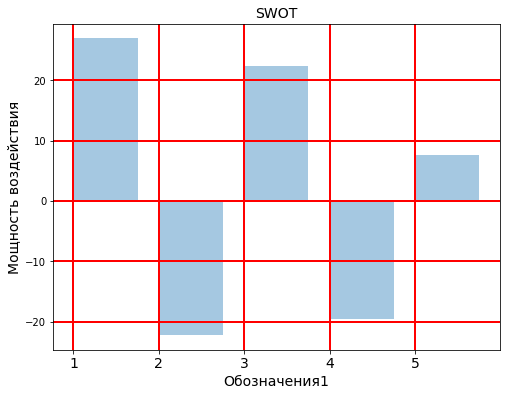

1 - Strengths : 26.9 ; 2 - Weaknesses : -22.2 ; 3 - Opportunities : 22.4 ; 4 - Threats : -19.5 ; 5 - Result : 7.6 ; 
[26.9, -22.2, 22.4, -19.5, 7.6]
 
Конец работы
-rw------- 1 root 5350 Mar 15 17:24 /content/drive/MyDrive/swot/task1.ipynb


['table1.gsheet', 'task1.ipynb']

In [52]:
#program was made by Vladislav Sokolov 20BI-2
import json
import matplotlib.pyplot as plt
import os
import time
import gspread
from google.colab import auth
from google.colab import drive
import numpy as np
from gspread.models import Cell

print("начало работы")
print("program was made by Vladislav Sokolov 20BI-2")
print(" ")
auth.authenticate_user()


print("Файлы используемые в номере")
print(os.listdir('/content/drive/MyDrive/swot'))

%ll -lF /content/drive/MyDrive/"swot"/task1.ipynb
from oauth2client.client import GoogleCredentials
gs = gspread.authorize(GoogleCredentials.get_application_default())
!ln -fs /usr/share/zoneinfo/Europe/Moscow /etc/localtime
!date



print('\nРаботаем с таблицей')
%ll -lAF /content/drive/MyDrive/"swot"/
try:
  os.stat('/content/drive/MyDrive/swot/table1.gsheet')
  table = gs.open_by_key('1AptBtUewGhvpCu5PD0FN16XwyV9QRuKvJYFfaUPpkho')
except Exception as mistake:
    print('\n',mistake)
    print("Необходимо создать таблицу\n")
    %ll -lAF /content/drive/MyDrive/
    gs_01 = gs.create('table_01')
    %ll -lAF /content/drive/MyDrive/
    print(gs_01)
    print (gs_01.id)
    print(dir(gs_01))
    %ll -lAF /content/drive/MyDrive/"swot"/task1.ipynb
    %mv  /content/drive/MyDrive/table_01.gsheet /content/drive/MyDrive/"swot"/task1.ipynb
    %ll -lAF /content/drive/MyDrive/"swot"/task1.ipynb


print('\nРаботаем с листом')
try:
  worksheet = table.worksheet('first')
except Exception as mistake:
    print('\n',mistake)
    print("Необходимо создать лист\n")
    worksheet = table.add_worksheet("list1",100,100)
#-----------------------------------------------------------------
rows = worksheet.get_all_values()


def print_names(Names,data):
  string=""
  for i in range(len(data)):
    string=string +str(i+1) +" - "+ str(Names[i])+ " : "+ str(data[i])+" ; "
  print(string)


def print_diagram(y):
  x =[]
  for i in range(1,len(y)+1):
    x.append(i)
  x_pos=list()
  for i in range(x.__len__()):
          x_pos.append(i)
  fig=plt.figure(figsize=(8,6), dpi=72)
  plt.bar(x_pos, y, width=0.75, align='edge', alpha=0.4)
  plt.xticks(x_pos,  x, fontsize=14)
  plt.xlabel('Обозначения1', fontsize=14)
  plt.ylabel('Мощность воздействия', fontsize=14)
  plt.title('SWOT', fontsize=14)
  plt.grid(True, color='r', linestyle='-', linewidth=2)
  plt.show()  
  

def multipication(rows,index,y):
  #print("вычилсяю сумму")
  summary =0
  data =[]
  Names=[]
  for i in range(1,index):
    try:
      mult = int(rows[i][y+3])*float(rows[i][y+4])
      mult = round(mult,1)
      worksheet.update_cell(i+1,y+6, str(mult))
      Names.append(rows[i][y+1])
      if (y==6 or y==18):
        mult = -1*mult
      summary += mult
      data.append(mult)
      #print(mult)
    except Exception as c:
      worksheet.update_cell(i+1,y+6, "0")
      #print("опа да пустой вывод")
  print_diagram(data)
  print_names(Names,data)
  print(data)
  worksheet.update_cell(i+2,y+6, str(summary))
  return summary


def get_data(rows,y):
  Names=[]
  diagram_data = []
  s=0
  myrows = np.array(rows)
  column = myrows[:,y]
  #print(myrows[:,y])
  index = 0
  for i in range(len(column)):
    if column[i] == "итог":
      index = i
  mult = multipication(rows,index,y)
  return mult


def get_swot(rows):
  Names =[]
  swot_data = []
  for i in range(len(rows[0])):
    if (rows[0][i] !=""):
      print("НОВЫЙ СТОЛБИК = ",rows[0][i])
      data_string = get_data(rows,i)
      Names.append(rows[0][i])
      swot_data.append(data_string)
      print("Сумма равна: ",data_string)
      print("")
  swot_data.append(round(sum(swot_data),1))
  Names.append("Result")
  print_diagram(swot_data)
  print_names(Names,swot_data)
  print(swot_data)


get_swot(rows)
print(" ")
print("Конец работы")
%ll -lAF /content/drive/MyDrive/"swot"/task1.ipynb
os.listdir('/content/drive/MyDrive/swot/')